In [21]:
#importing dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [22]:
#import dataset 
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values  
y = dataset.iloc[:, 13].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [23]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 0)
train_X

array([[1.364e+01, 3.100e+00, 2.560e+00, ..., 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.260e+01, 2.460e+00, 2.200e+00, ..., 7.300e-01, 1.580e+00,
        6.950e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

In [24]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
Scale_X = StandardScaler()
train_X = Scale_X.fit_transform(train_X)
test_X = Scale_X.transform(test_X)
train_X

array([[ 0.79996869,  0.63400362,  0.71783316, ...,  0.05445565,
         1.0713277 ,  0.31500451],
       [-0.49875982,  0.06171955, -0.61072701, ..., -0.93473577,
        -1.39249704, -0.18138885],
       [-1.29797736, -1.16332605, -0.24168252, ...,  0.18348062,
         0.75296832,  0.45068536],
       ...,
       [-0.72353975, -0.69834524, -0.64763146, ...,  0.48453887,
         0.51765922, -1.33964004],
       [ 1.12465081, -0.63575167, -0.90596261, ..., -0.16058596,
         1.02980256,  0.77830498],
       [ 1.44933294,  0.10642924,  0.42259757, ..., -1.40782731,
        -1.21255479, -0.29721397]])

In [25]:
#Applying LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components= 2)
train_X = lda.fit_transform(train_X,train_y)
test_X = lda.transform(test_X)
train_X

array([[-3.75722986e+00,  1.78224173e+00],
       [ 3.71779979e+00,  8.55757484e-01],
       [-4.41722893e-02, -2.02249034e+00],
       [ 3.50295061e+00,  1.99910076e+00],
       [-3.87566163e+00,  2.65077482e+00],
       [ 3.31635950e+00,  7.26729526e-01],
       [ 3.76757806e+00,  1.03585429e+00],
       [-3.50642318e+00,  1.01134789e-01],
       [ 5.56617679e+00,  2.31052117e+00],
       [-5.52600002e+00,  6.92702501e-01],
       [ 3.34933278e-01, -3.89801248e+00],
       [ 4.83234812e+00,  3.19745682e+00],
       [ 3.43511567e+00,  9.59123009e-01],
       [-1.06452054e+00, -2.32005170e+00],
       [ 3.47410738e+00,  6.35730414e-01],
       [ 5.06710351e+00,  2.38898005e+00],
       [-2.95021113e+00,  1.13904083e+00],
       [ 1.87126516e+00, -4.32025549e-01],
       [ 3.96376090e+00, -1.85802042e-01],
       [-9.49159879e-01, -3.32074700e+00],
       [ 1.84114933e+00, -5.83464878e-01],
       [ 3.17380882e+00,  1.49403616e+00],
       [-4.69174963e-01, -1.18843006e+00],
       [-4.

In [26]:
#Create, fit and train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#Making predictions 
predicted_y = logreg.predict(test_X)

In [28]:
#checking the performance of the model 
logreg_pred_test_df = pd.DataFrame({'Expected':test_y, 'Predicted Score':predicted_y })
logreg_pred_test_df.head(10)


,Expected,Predicted Score
0,1,1
1,3,3
2,2,2
3,1,1
4,2,2
5,2,2
6,1,1
7,3,3
8,2,2
9,2,2


In [29]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(test_y,predicted_y)
con_matrix

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  0,  8]])

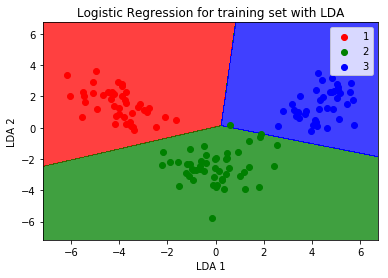

In [30]:
#Visualizing the training set
from matplotlib.colors import ListedColormap
X_set,y_set = train_X, train_y
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1,X2, logreg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
    
plt.title('Logistic Regression for training set with LDA')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()


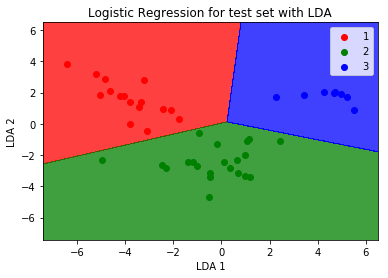

In [31]:
#Visualizing the test set
from matplotlib.colors import ListedColormap
X_set,y_set = test_X, test_y
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1,X2, logreg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
    
plt.title('Logistic Regression for test set with LDA')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()